## Notes
### Initial brainstorming: 
What could be interesting about this dataset?
- Do people tip better on weekends? More likely to be out for the evening, possibly more likely to have a drink and therefore more likely to be generous with a tip?
- Do people tip more if they are part of a larger group? More people to chip in? Social pressure? Or would they be less likely to tip as the blame can be diffused among the group?
- On the other hand, are people likely to tip less if they are on theor own?
- Is there a sex difference in tipping? Why would there be? 
- Similarly, are men or women more likely to pay? Is there a difference in genders paying depending on group size? Cliche that men pay for dates if we look at tables of 2? Would the tips be higher in such cases?
- How is the dataset gendered if there are several people at each table? Presumably the person that pays for the table is the gender recorded.
- Do tips on average make up 10-15% of the bill or do they just round up to the nearest fiver/euro?
- Does tip percentage of the bill grow as the bill does?
- Are smokers more likely to tip? Why would they be/not? Maybe they would tip more as they are exposing staff to their smoking? Probably not enough smoker data to be significant.  
- Are smaller groups more likely to sit in smoking sections? Consideration for the whole group. Would the restaurant have more room for larger groups if they were to get rid of the smoking section? 
- Is there a difference in tips on weekdays versus the weekend? On weekdays would people be more likely to just be grabbing a work lunch? Similarly, are the overall bills lower? - Doesn't have all days of the week, just Thurs-Sun. 
- Which days/mealtimes are busiest? Does this affect the tips? Perhaps the service isn't as great if the place is super busy?
- Is it more likely there are larger groups on weekends as would be assumed?

https://scholarship.sha.cornell.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1036&context=articles
Article from 1984 seeing tipping is related to group size (larger groups tipped less), gender (men tipped more than women), and bill size (larger the per person bill, the lower the tip %). Of course, this is an old article. Would it even still be relevant?

Some plotting with tips database
https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset
https://seaborn.pydata.org/tutorial/categorical.html


Knowledge gaps in this database that could affect tipping:
- Food quality
- Customer service
- Restaurant atmosphere
- Payment methods (cash v credit)
- Customer demographics
- Length of time customer spent in the restaurant


In [1]:
# Importing libraries.
import seaborn as sns
sns.set() # apply default seaborn theme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<br>

### Loading the Dataset

The tips dataset is available through the seaborn library.  A summary of information about the dataset shows that it loads as a pandas dataframe, which will be useful for statistical analysis. There are 7 columns with 244 entries in each and, thankfully, no missing values to contend with. 

In [2]:
# Load dataset and view information.
tips_df = sns.load_dataset("tips")
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


<br>

### Dataset Layout

The sample below gives an overview of the layout of the dataset. The datatypes of each column listed in the previous section appear to be the most appropriate for the data being represented, ie. numerical data is stored as floats or integers and categorical data is stored as categories. 

In [3]:
# View a sample of the dataset.
tips_df.sample(10)

,total_bill,tip,sex,smoker,day,time,size
218,7.74,1.44,Male,Yes,Sat,Dinner,2
212,48.33,9.00,Male,No,Sat,Dinner,4
126,8.52,1.48,Male,No,Thur,Lunch,2
194,16.58,4.00,Male,Yes,Thur,Lunch,2
208,24.27,2.03,Male,Yes,Sat,Dinner,2
89,21.16,3.00,Male,No,Thur,Lunch,2
169,10.63,2.00,Female,Yes,Sat,Dinner,2
162,16.21,2.00,Female,No,Sun,Dinner,3
150,14.07,2.50,Male,No,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


<br>

### Basic Statistics

Below are some basic descriptive statistics for the tips dataset. The first section describes the numeric columns and the second describes the categorical columns. While it is possible to view all of these statistics in one table by using the include='all' argument in the .describe() method, I decided to split them as there are different fields for different datatypes and separating them makes them more readable.

Firstly, the numerical data shows the average total bill amount is 19.79 with an average tip of just under 3.00 and an average group size between 2-3 people. These figures may indicate that the food establishment may perhaps be a cafe or bistro rather than a large restaurant. 

In [4]:
# Numerical statistics.
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<br>
The statistics for categorical data below shows that there are 2 unique values for the 'sex' and 'smoker' categories, Male/Felmale and Yes/No respectively, as one would expect for these categories. The data looks to be spread across 4 days of the week and 2 mealtimes are assessed. Overall these categories demonstrate than most bills were paid by non-smoking men and the restaturant was busiest on Saturday at dinner time. 

In [5]:
# Categorical statistics.
categories = tips_df[['sex', 'smoker', 'day', 'time']]
categories.describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


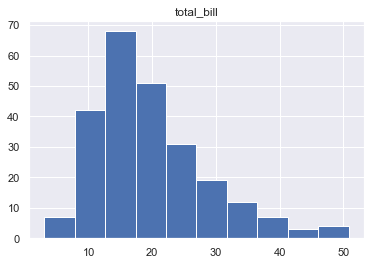

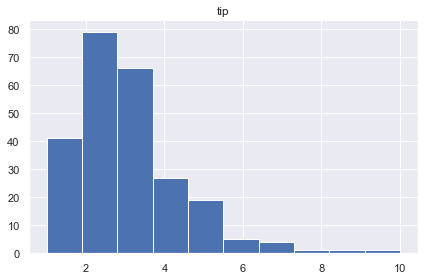

In [6]:
# Bill and tip histograms
tips_df.hist('total_bill')
tips_df.hist('tip')
plt.tight_layout()

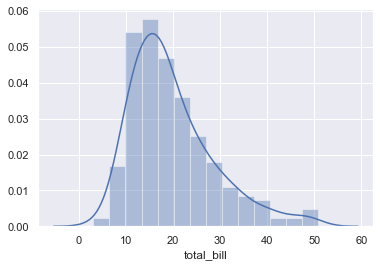

In [7]:
# Total bill histogram using seaborn
sns.distplot(tips_df.total_bill)

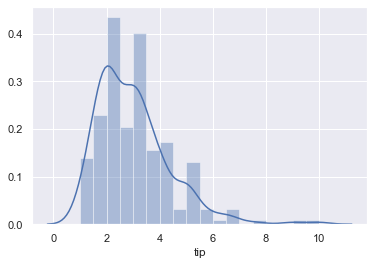

In [8]:
# Tips histogram using seaborn
sns.distplot(tips_df.tip)

<br>

### Visualising Categorical Data

Help here: https://stackoverflow.com/a/31499100 and https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html



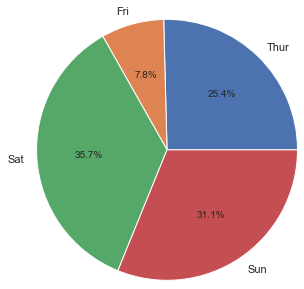

In [9]:
# Pie chart showing percentage of entries by day.
day = tips_df.groupby('day').size()
plt.pie(day, labels=day.index, radius=1.5, autopct='%1.1f%%')
plt.show()

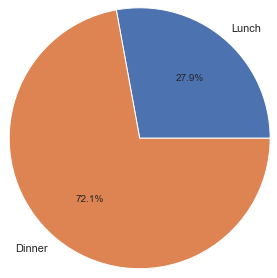

In [10]:
# Pie chart showing percentage of dataset entries for each meal time
time = tips_df.groupby('time').size()
plt.pie(time, labels=time.index, radius=1.5, autopct='%1.1f%%')
plt.show()

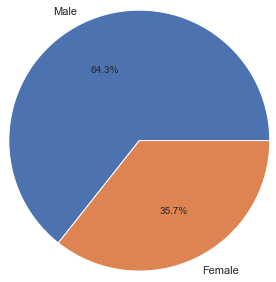

In [12]:
# Pie chart showing percentage of men and women who paid the bill.
sex = tips_df.groupby('sex').size()
plt.pie(sex, labels=sex.index, radius=1.5, autopct='%1.1f%%')
plt.show()

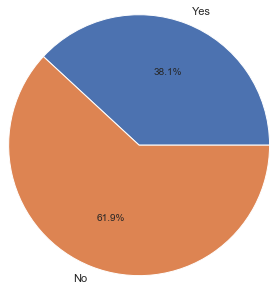

In [13]:
# Pie chart showing percentage that were smokers and non-smokers 
smoker = tips_df.groupby('smoker').size()
plt.pie(smoker, labels=smoker.index, radius=1.5, autopct='%1.1f%%')
plt.show()

In [14]:
tips_df.groupby('time').mean()

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


In [15]:
tips_df.groupby('smoker').mean()

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


In [16]:
by_time = tips_df.groupby('time').total_bill.describe()
by_time

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


In [17]:
by_sex = tips_df.groupby('sex').total_bill.describe()
by_sex

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,20.744076,9.246469,7.25,14.00,18.35,24.71,50.81
Female,87.0,18.056897,8.009209,3.07,12.75,16.40,21.52,44.30


In [18]:
by_smoker = tips_df.groupby('smoker').total_bill.describe()
by_smoker

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,20.756344,9.832154,3.07,13.420,17.92,26.860,50.81
No,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33


In [19]:
by_day = tips_df.groupby('day').total_bill.describe()
by_day

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


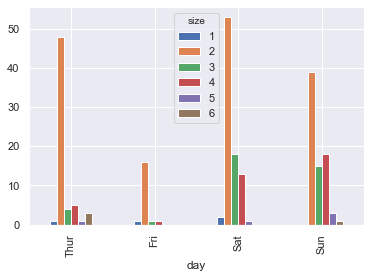

In [20]:
# Example in Python for data analysis p. 274
# Shows group size by day
groups = pd.crosstab(tips_df['day'], tips_df['size'])
groups.plot.bar()

In [21]:
# tip percent column
tip_percent = tips_df.tip/tips_df.total_bill*100

# total bill + tip
total_paid = tips_df.tip + tips_df.total_bill 


In [22]:
# Help from Python for data analysis p. 302

# adding tip percent column to dataset
tips_df['tip_percent'] = tip_percent

# define a function to find the top tipper
def top_tipper(df, n=5, column='tip_percent'):
    return df.sort_values(by=column)[-n:]

top_tipper(tips_df, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.952481
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483


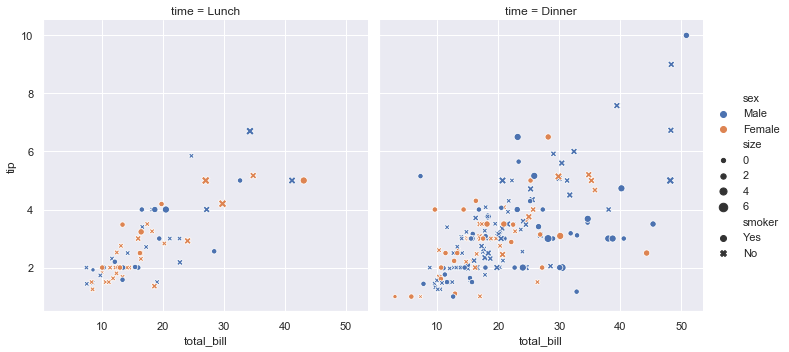

In [53]:
# https://seaborn.pydata.org/introduction.html
sns.relplot(x="total_bill", y="tip", col="time", hue="sex", style="smoker", size="size", data=tips_df)

The below swarm plot might give an idea of the workers shifts over the days measured. It looks like they had the lunch shift on Thursday and perhaps had one last table for dinner before their shift ended. On Saturday and Sunday the staff member had only dinner services. Perhaps on Friday the worker had a half day, working the end of lunch and beginning of dinner. This is probably more likely than the restaurant being that quiet on Friday.

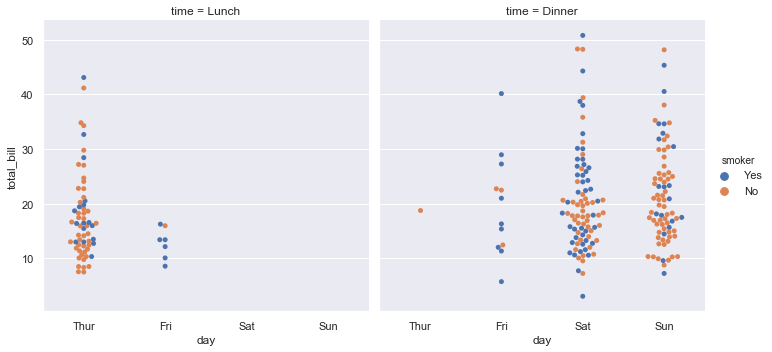

In [62]:
# https://seaborn.pydata.org/introduction.html
sns.catplot(x="day", y="total_bill", hue="smoker", col="time", kind="swarm", data=tips_df);

In [60]:
tips_df.groupby(["day", "time"]).size()

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Dinner    87
Sun   Dinner    76
dtype: int64

<br>

## Regression

Followed this guide: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

Linear regression is a type of predictive analysis that can assess whether there is a linear relationship between a dependent variable and one or more independent variables. With the tips dataset, I will use linear regression to see if tips (dependent variable) can be predicted based on the total bill amount (independent variable). 

The 2-dimensional plot below visualises the relationship between the total bill and tip values. It might be expected that the higher the bill, the higher the tip would be and there does appear to be a slight linear trend in that direction. This pattern looks to be more evident in the lower bill amounts (under €25 or so) but that could be related to the relatively few bills that are in the higher bracket.

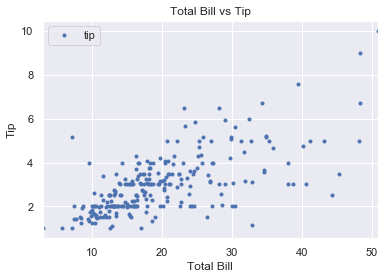

In [24]:
# Plotting total bill versus tip
tips_df.plot(x='total_bill', y='tip', style='.')  
plt.title('Total Bill vs Tip')  
plt.xlabel('Total Bill')  
plt.ylabel('Tip')  
plt.show()

In [25]:
# number of bills under €25 (probably not needed - percentage and graph should be enough)
tips_df.total_bill[tips_df.total_bill < 25].count()

188

The descriptive statistics in the first section showed that 75% of the total bills were under 24.1275 and the plot below demonstrates how the bills are largely skewed to the lower end of the scale with most roughly between 10-20. 

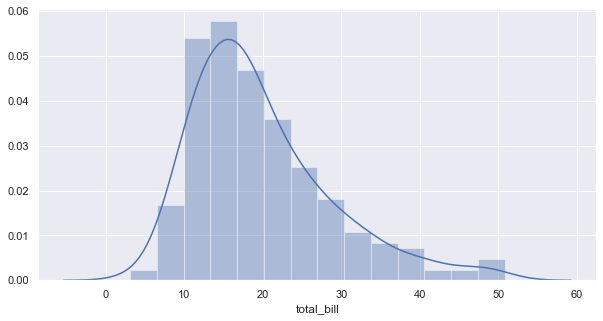

In [26]:
plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.distplot(tips_df['total_bill'])
plt.show()

Similarly, the tips also skew towards the lower end of the scale. 

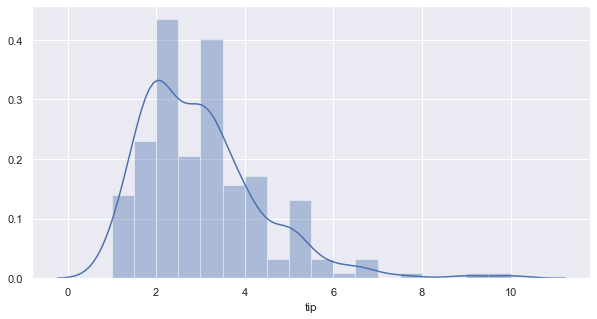

In [28]:
plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.distplot(tips_df['tip'])
plt.show()

The data next needs to be divided into attributes (independent variable - total_bill) and labels (dependent variable - tips).
Figure out what the (-1, 1) is about.

In [29]:
X = tips_df['total_bill'].values.reshape(-1,1)
y = tips_df['tip'].values.reshape(-1,1)

Training and testing the linar regression model. The data will be split into 80% for testing and 20% for training

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# intercept (where it intercepts an axis??)
print(regression.intercept_) 

[1.02854395]


In [33]:
# slope (steepness of the line)
print(regression.coef_)

[[0.0968534]]


In [35]:
# Prediction - test
y_pred = regression.predict(X_test)

In [36]:
# Compare test predictions against acutal data
test_model = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
test_model

,Actual,Predicted
0,2.64,2.732195
1,3.76,2.799993
2,3.51,2.916217
3,1.00,1.730731
4,2.50,2.604349
5,1.00,1.585451
6,3.08,2.764157
7,5.65,3.288134
8,3.50,2.786433
9,3.68,4.384514


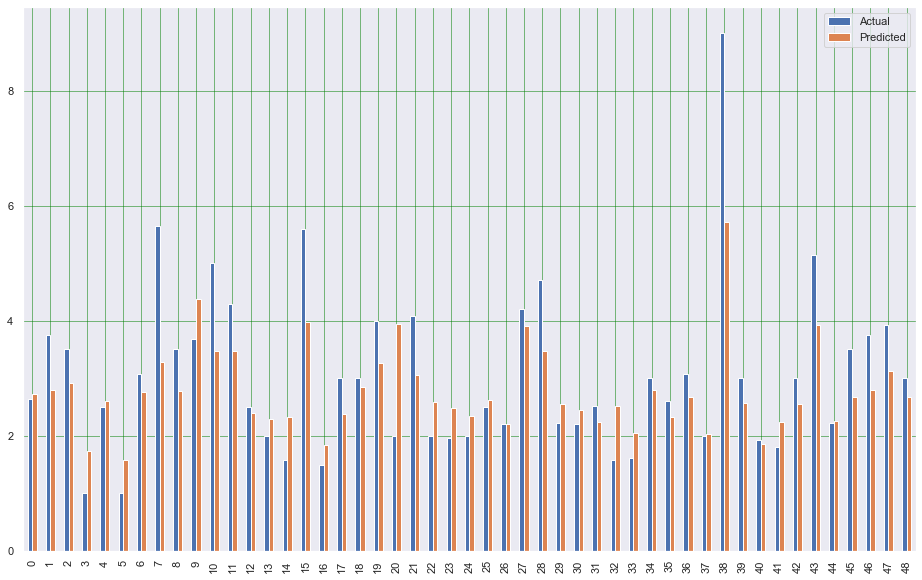

In [37]:
# View the prediction versus actual values as a bar chart
test_model.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Slope of the line a bit low?

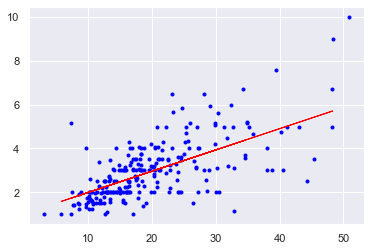

In [51]:
# lining it up with the whole dataset (changed it to whole dataset rather than just test data as in example - we have a much smaller dataset)
plt.scatter(tips_df.total_bill, tips_df.tip, marker='.', color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [39]:
# Evaluating the performance of the algorithm
# Figure out what these mean!
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6564074900962108
Mean Squared Error: 0.821309064276629
Root Mean Squared Error: 0.9062610353957787


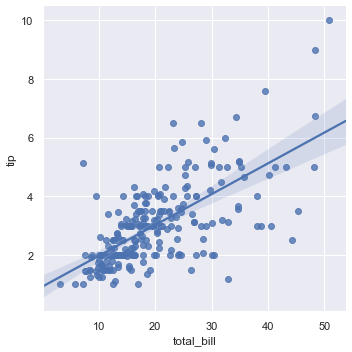

In [48]:
# Actual linear regression model
# https://seaborn.pydata.org/introduction.html
sns.lmplot(x="total_bill", y="tip", data = tips_df)

#### Are smokers better tippers?

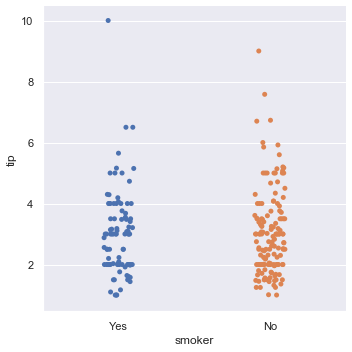

In [63]:
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.catplot(x="smoker", y="tip", data=tips_df);

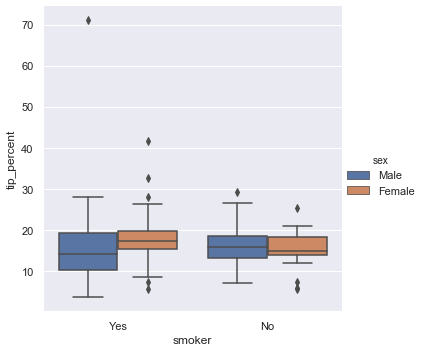

In [66]:
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.catplot(x="smoker", y="tip_percent", hue="sex", kind="box", data=tips_df)